<a href="https://colab.research.google.com/github/tylee33/RL_Lecture/blob/master/%5BRL%EA%B0%95%EC%9D%98%5DGridWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random, math, copy

In [0]:
class grids_world:
    def __init__(self, random_init=False):
        self.states = [[0.0,0.0,0.0,0.0],
                        [0.0,0.0,0.0,0.0],
                        [0.0,0.0,0.0,0.0],
                        [0.0,0.0,0.0,0.0]]
        if random_init:
            self.states = self.randomize_grids(self.states)
        self.actions = ('up', 'down', 'right', 'left')
        self.K = 0
        self.model = self.init_model()
        self.P = self.get_P()
        self.policy = {(s, a):1/len(self.actions) for s in range(1, 15) for a in self.actions}
        self.gamma = 1.0
        
    def get_action(self):
        return random.choice(self.actions)
    
    def init_model(self):
        model = {}
        for s in range(16):
            if s in (0, 15): continue
            model[s, 'down'] = s+4, -1
            model[s, 'up'] = s-4, -1
            model[s, 'left'] = s-1, -1
            model[s, 'right'] = s+1, -1
            if s in (1, 2, 3):
                model[s, 'up'] = s, -1
            if s in (3, 7, 11):
                model[s, 'right'] = s, -1
            if s in (4, 8, 12):
                model[s, 'left'] = s, -1
            if s in (12, 13, 14):
                model[s, 'down'] = s, -1
        return model
    
    def get_P(self):
        P = {}
        for s in range(16):
            if s in (0, 15): continue
            for a in self.actions:
                s_n, r = self.model[s, a]
                for other_s in range(16):
                    if other_s == s_n:
                        P[s, a, s_n, r] = 1
                    else:
                        P[s, a, other_s, -1] = 0
        return P
    
    def randomize_grids(self, grids):
        for i in range(len(grids)):
            for j in range(len(grids[0])):
                if (i,j) == (0., 0.) or (i,j) == (3.,3.): continue
                grids[i][j] = random.random()
        return grids
    
    def loop(self, by=20):
        for k in range(by):
            for s in range(1, 15):
                x_pos = s // 4 
                y_pos = s % 4
                val = 0
                for a in self.actions:
                    act_prob = self.policy[s, a]
                    n_s, r = self.model[s, a]
                    n_x_pos = n_s // 4 
                    n_y_pos = n_s % 4
                    val_n_s = self.states[n_x_pos][n_y_pos]
                    p = self.P[s, a, n_s, r]
                    val += act_prob * p * (r + self.gamma*val_n_s)
                self.states[x_pos][y_pos] = round(val, 1)
            self.K += 1
            
    def get_greedy_policy(self):
        gr_policy_map = {}
        for s in range(1, 15):
            temp = []
            for a in self.actions:
                n_s, r = self.model[s, a]
                if n_s != s:
                    n_x_pos = n_s // 4 
                    n_y_pos = n_s % 4
                    n_s_v = self.states[n_x_pos][n_y_pos]
                    temp.append((a, int(n_s_v)))
            max_acts = [ele[0] for ele in temp if ele[1]==max(temp, key=lambda x: x[1])[1]]
            gr_policy_map[s] = max_acts
        return gr_policy_map

In [3]:
env = grids_world(random_init=False)
print(env.states)
env.loop(20)
print(env.states)

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
[[0.0, -11.4, -16.2, -17.9], [-11.4, -14.8, -16.5, -16.6], [-16.3, -16.6, -15.1, -11.8], [-18.0, -16.6, -11.8, 0.0]]


In [4]:
env.get_greedy_policy()

{1: ['left'],
 2: ['left'],
 3: ['down', 'left'],
 4: ['up'],
 5: ['up', 'left'],
 6: ['left'],
 7: ['down'],
 8: ['up'],
 9: ['up'],
 10: ['down', 'right'],
 11: ['down'],
 12: ['up', 'right'],
 13: ['right'],
 14: ['right']}

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Visualization

def display(ks):
    for k in ks:
        env = grids_world()
        env.loop(k)
        fig = plt.figure(figsize=(10,3))

        ax = fig.add_subplot(111)
        ax.set_ylabel('K='+str(env.K))
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

        ax1 = fig.add_subplot(121)
        ax1.set_title('V for the random policy')
        ax2 = fig.add_subplot(122)
        ax2.set_title('Greedy policy wrt k-th V')
        ax1.imshow(env.states, cmap='gray')
        ax1.set_yticks(range(len(env.states)))
        ax1.set_xticks(range(len(env.states[0])))

        for i in range(len(env.states)):
            for j in range(len(env.states[0])):
                if (i, j) in [(0, 0), (3, 3)]:
                    ax1.text(j, i, env.states[i][j], ha="center", va="center", color="black")
                else:
                    ax1.text(j, i, env.states[i][j], ha="center", va="center", color="w")

        ax2.imshow(env.states, cmap='gray')
        ax2.set_yticks(range(len(env.states)))
        ax2.set_xticks(range(len(env.states[0])))
        margin = 0.4
        for i in range(len(env.states)):
            for j in range(len(env.states[0])):
                if (i, j) in [(0, 0), (3, 3)]:
                    continue
                else:
                    cord = i*4 + j
                    directs = env.get_greedy_policy()[cord]
                    for d in directs:
                        if d == 'up':
                            xy = j, i-margin
                        elif d == 'down':
                            xy = j, i+margin
                        elif d == 'right':
                            xy = j+margin, i
                        elif d == 'left':
                            xy = j-margin, i
                        ax2.annotate('', xy=xy, xytext=(j,i), 
                                arrowprops=dict(arrowstyle="simple", color='w'))

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


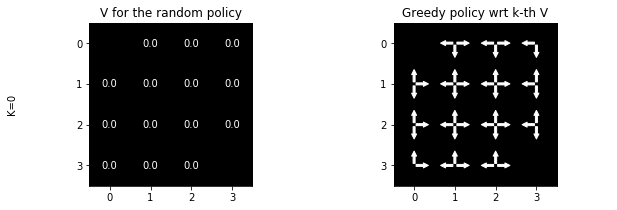

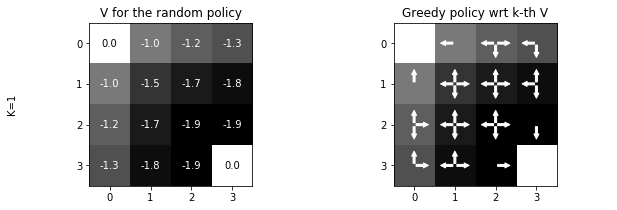

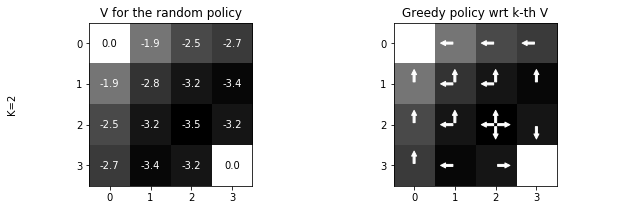

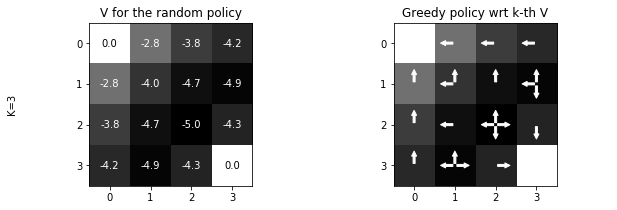

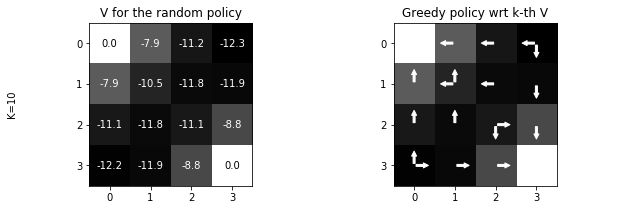

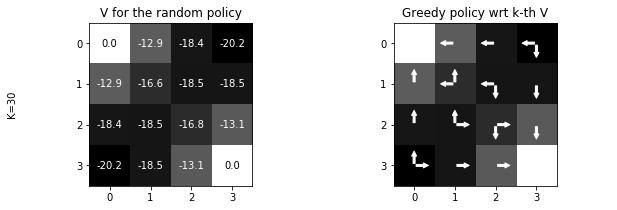

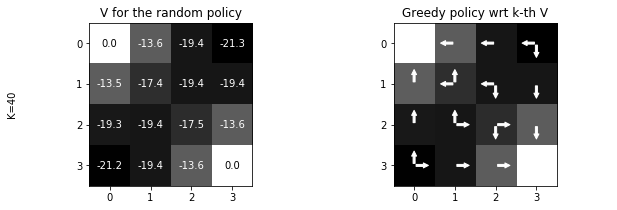

In [7]:
display([0, 1, 2, 3, 10, 30, 40])